In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import timedelta

Датасет - `bus_table.csv`
- `data` - дата
- `route` - название маршрута автобуса
- `direction` - направление маршрута
- `scheduled` - время прибыттия по расписанию
- `actual` - фактическое время прибытия

## Задание 1
Прочитайте файл, сохранив результаты в `df`. Посмотрите статистики и инфо.

In [2]:
df = pd.read_csv('bus_table.csv')

In [3]:
df.head(5)

,data,route,direction,scheduled,actual
0,2016-03-26,A,south,01:11:57,01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46
3,2016-03-26,A,south,19:04:57,19:01:49
4,2016-03-26,A,south,16:42:57,16:42:39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39157 entries, 0 to 39156
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       39157 non-null  object
 1   route      39157 non-null  object
 2   direction  39157 non-null  object
 3   scheduled  38917 non-null  object
 4   actual     39157 non-null  object
dtypes: object(5)
memory usage: 1.8+ MB


In [5]:
df.describe()

,data,route,direction,scheduled,actual
count,39157,39157,39157,38917,39157
unique,63,3,2,1356,27633
top,2016-04-14,A,north,23:00:25,08:08:24
freq,693,13358,19686,64,8


In [6]:
df.drop_duplicates(inplace=True)

## Задание 2
Вырежте пропушеные данные (сохраните их в DataFrame `df_null`, они вам еще понадобятся) и удалите их из `df`. Выведите размерность `df_null`.

In [7]:
df_null = df[df.isnull().any(axis=1)].copy()

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(38905, 5)

In [10]:
df.head(3)

,data,route,direction,scheduled,actual
0,2016-03-26,A,south,01:11:57,01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38905 entries, 0 to 39156
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       38905 non-null  object
 1   route      38905 non-null  object
 2   direction  38905 non-null  object
 3   scheduled  38905 non-null  object
 4   actual     38905 non-null  object
dtypes: object(5)
memory usage: 1.8+ MB


## Задание 3
1. Добавьте столбец `table` дату/время прибытия автобусов по расписанию на остановку. 
2. Добавьте столбец `arrival` дату/временя актуального прибытия автобуса на остановку.


In [12]:
df['delimiter'] = ' '

df['table'] = pd.to_datetime(df[['data', 'delimiter','scheduled']].sum(axis=1), format='%Y-%m-%d %H:%M:%S')
df['arrival'] = pd.to_datetime(df[['data', 'delimiter', 'actual']].sum(axis=1), format='%Y-%m-%d %H:%M:%S')

df.drop(columns=['delimiter'], inplace=True)

# Функция для обработки случаев перехода времени на следующий день.
def adjust_arrival(df):

    diff_arrival_table = (df['arrival'] - df['table']).dt.total_seconds() / 60
    diff_table_arrival = (df['table'] - df['arrival']).dt.total_seconds() / 60
    
    df.loc[diff_arrival_table > 1350, 'arrival'] -= pd.Timedelta(days=1)
    df.loc[diff_table_arrival > 1350, 'arrival'] += pd.Timedelta(days=1)
    
    return df

adjust_arrival(df)

,data,route,direction,scheduled,actual,table,arrival
0,2016-03-26,A,south,01:11:57,01:13:19,2016-03-26 01:11:57,2016-03-26 01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13,2016-03-26 23:19:57,2016-03-26 23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46,2016-03-26 21:19:57,2016-03-26 21:18:46
3,2016-03-26,A,south,19:04:57,19:01:49,2016-03-26 19:04:57,2016-03-26 19:01:49
4,2016-03-26,A,south,16:42:57,16:42:39,2016-03-26 16:42:57,2016-03-26 16:42:39
...,...,...,...,...,...,...,...
39152,2016-05-27,B,north,10:50:25,10:49:50,2016-05-27 10:50:25,2016-05-27 10:49:50
39153,2016-05-27,B,north,13:02:27,13:07:10,2016-05-27 13:02:27,2016-05-27 13:07:10
39154,2016-05-27,B,north,15:14:29,15:15:55,2016-05-27 15:14:29,2016-05-27 15:15:55
39155,2016-05-27,B,north,17:26:29,17:25:40,2016-05-27 17:26:29,2016-05-27 17:25:40


In [13]:
display(df.head(3))
df.info()

,data,route,direction,scheduled,actual,table,arrival
0,2016-03-26,A,south,01:11:57,01:13:19,2016-03-26 01:11:57,2016-03-26 01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13,2016-03-26 23:19:57,2016-03-26 23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46,2016-03-26 21:19:57,2016-03-26 21:18:46


<class 'pandas.core.frame.DataFrame'>
Index: 38905 entries, 0 to 39156
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   data       38905 non-null  object        
 1   route      38905 non-null  object        
 2   direction  38905 non-null  object        
 3   scheduled  38905 non-null  object        
 4   actual     38905 non-null  object        
 5   table      38905 non-null  datetime64[ns]
 6   arrival    38905 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(5)
memory usage: 2.4+ MB


## Задание 4
1. Найдите три самых часто встречаюшихся в расписании автобусов временных интервалов (естественно для каждой возможной пары номер маршрута-направление).

2. Добавьте в таблицу столбик `inteval` - интервал по расписаню между автобусами (естественно одного маршрута и направления) в МИНУТАХ.

3. Добавьте в таблицу столбик `arr_inteval` - интервал по фактическому между автобусами (естественно одного маршрута и направления) в МИНУТАХ.

In [14]:
sorted_df = df.sort_values(by=['route', 'direction', 'table']).copy()
sorted_df['diff'] = sorted_df['table'].diff()
sorted_df.fillna(pd.Timedelta(0), inplace=True)

itog_df = sorted_df.groupby(['route', 'direction', 'diff']).size().groupby(level=['route', 'direction'], group_keys=False).nlargest(3).to_frame().copy()
itog_df.rename(columns={0: 'Частота интервала'}, inplace=True)
itog_df

Частота интервала
route direction diff                              
A     north     0 days 00:12:00               1434
                0 days 00:15:00               1377
                0 days 00:07:00                756
      south     0 days 00:15:00               1453
                0 days 00:12:00               1312
                0 days 00:08:00                710
B     north     0 days 00:15:00               1507
                0 days 00:12:00               1413
                0 days 00:08:00               1141
      south     0 days 00:15:00               1391
                0 days 00:12:00               1300
                0 days 00:08:00               1159
C     north     0 days 00:10:00               1869
                0 days 00:15:00                590
                0 days 00:06:00                552
      south     0 days 00:10:00               1342
                0 days 00:12:00               1087
                0 days 00:15:00               1049

In [15]:
sorted_df = sorted_df.drop('diff', axis=1)

In [16]:
def calculate_intervals1(group):
    # Вычисление разницы во времени между соседними строками в минутах для колонки 'table'
    group = group.sort_values(by='table')
    group['interval'] = group['table'].diff().dt.total_seconds() / 60
    return group

def calculate_intervals2(group):
    # Вычисление разницы во времени между соседними строками в минутах для колонки 'arrival'
    group = group.sort_values(by='arrival')
    group['arr_interval'] = group['arrival'].diff().dt.total_seconds() / 60
    return group

# Применение функции к каждой группе без сброса индекса группы
result_df = sorted_df.groupby(['route', 'direction']).apply(calculate_intervals1).reset_index(drop=True)
result_df = result_df.groupby(['route', 'direction']).apply(calculate_intervals2).reset_index(drop=True)

display(result_df)


,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval
0,2016-03-26,A,north,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01,NaN,NaN
1,2016-03-26,A,north,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19,30.00,25.300000
2,2016-03-26,A,north,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15,35.00,39.933333
3,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,65.00,68.916667
4,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,195.05,185.650000
...,...,...,...,...,...,...,...,...,...
38900,2016-05-27,C,south,22:33:59,22:38:37,2016-05-27 22:33:59,2016-05-27 22:38:37,13.00,15.550000
38901,2016-05-27,C,south,22:48:59,22:48:23,2016-05-27 22:48:59,2016-05-27 22:48:23,15.00,9.766667
38902,2016-05-27,C,south,23:03:59,23:05:18,2016-05-27 23:03:59,2016-05-27 23:05:18,15.00,16.916667
38903,2016-05-27,C,south,23:23:59,23:29:38,2016-05-27 23:23:59,2016-05-27 23:29:38,20.00,24.333333


In [17]:
# with pd.option_context('display.max_rows', None):
#     display(result_df)

##### Задание 5
Найдите время в минутах для опоздания авдобуса (+ задержка, - раньше расписания)

In [18]:
result_df['delay_minutes'] = result_df['arrival'].sub(result_df['table']).dt.total_seconds() / 60
result_df.head()

,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval,delay_minutes
0,2016-03-26,A,north,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01,NaN,NaN,4.600000
1,2016-03-26,A,north,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19,30.00,25.300000,-0.100000
2,2016-03-26,A,north,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15,35.00,39.933333,4.833333
3,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,65.00,68.916667,8.750000
4,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,195.05,185.650000,-0.650000


## Задание 6
1. Постройте максимально качественные гистограммы (или их аналоги) для разницы интервалов между автобусами для различных маршрутов и направлений.

2. Постройте максимально качественные гистограммы (или их аналоги) времени опоздания автобуса в зависимости от маршрута и направления.

   Увидели абсурд - возращаемся к началу и латаем код ;)

In [19]:
result_df['diff_intervals'] = round(result_df['interval'] - result_df['arr_interval'])
new_df = result_df.groupby(['route', 'direction', 'diff_intervals']).size().to_frame().reset_index()

new_df = new_df.rename(columns={0: 'quantity'})
new_df

,route,direction,diff_intervals,quantity
0,A,north,-65.0,1
1,A,north,-46.0,1
2,A,north,-38.0,1
3,A,north,-32.0,1
4,A,north,-31.0,2
...,...,...,...,...
267,C,south,15.0,6
268,C,south,16.0,5
269,C,south,17.0,3
270,C,south,18.0,1


In [20]:
# with pd.option_context('display.max_rows', None):
#     display(new_df)

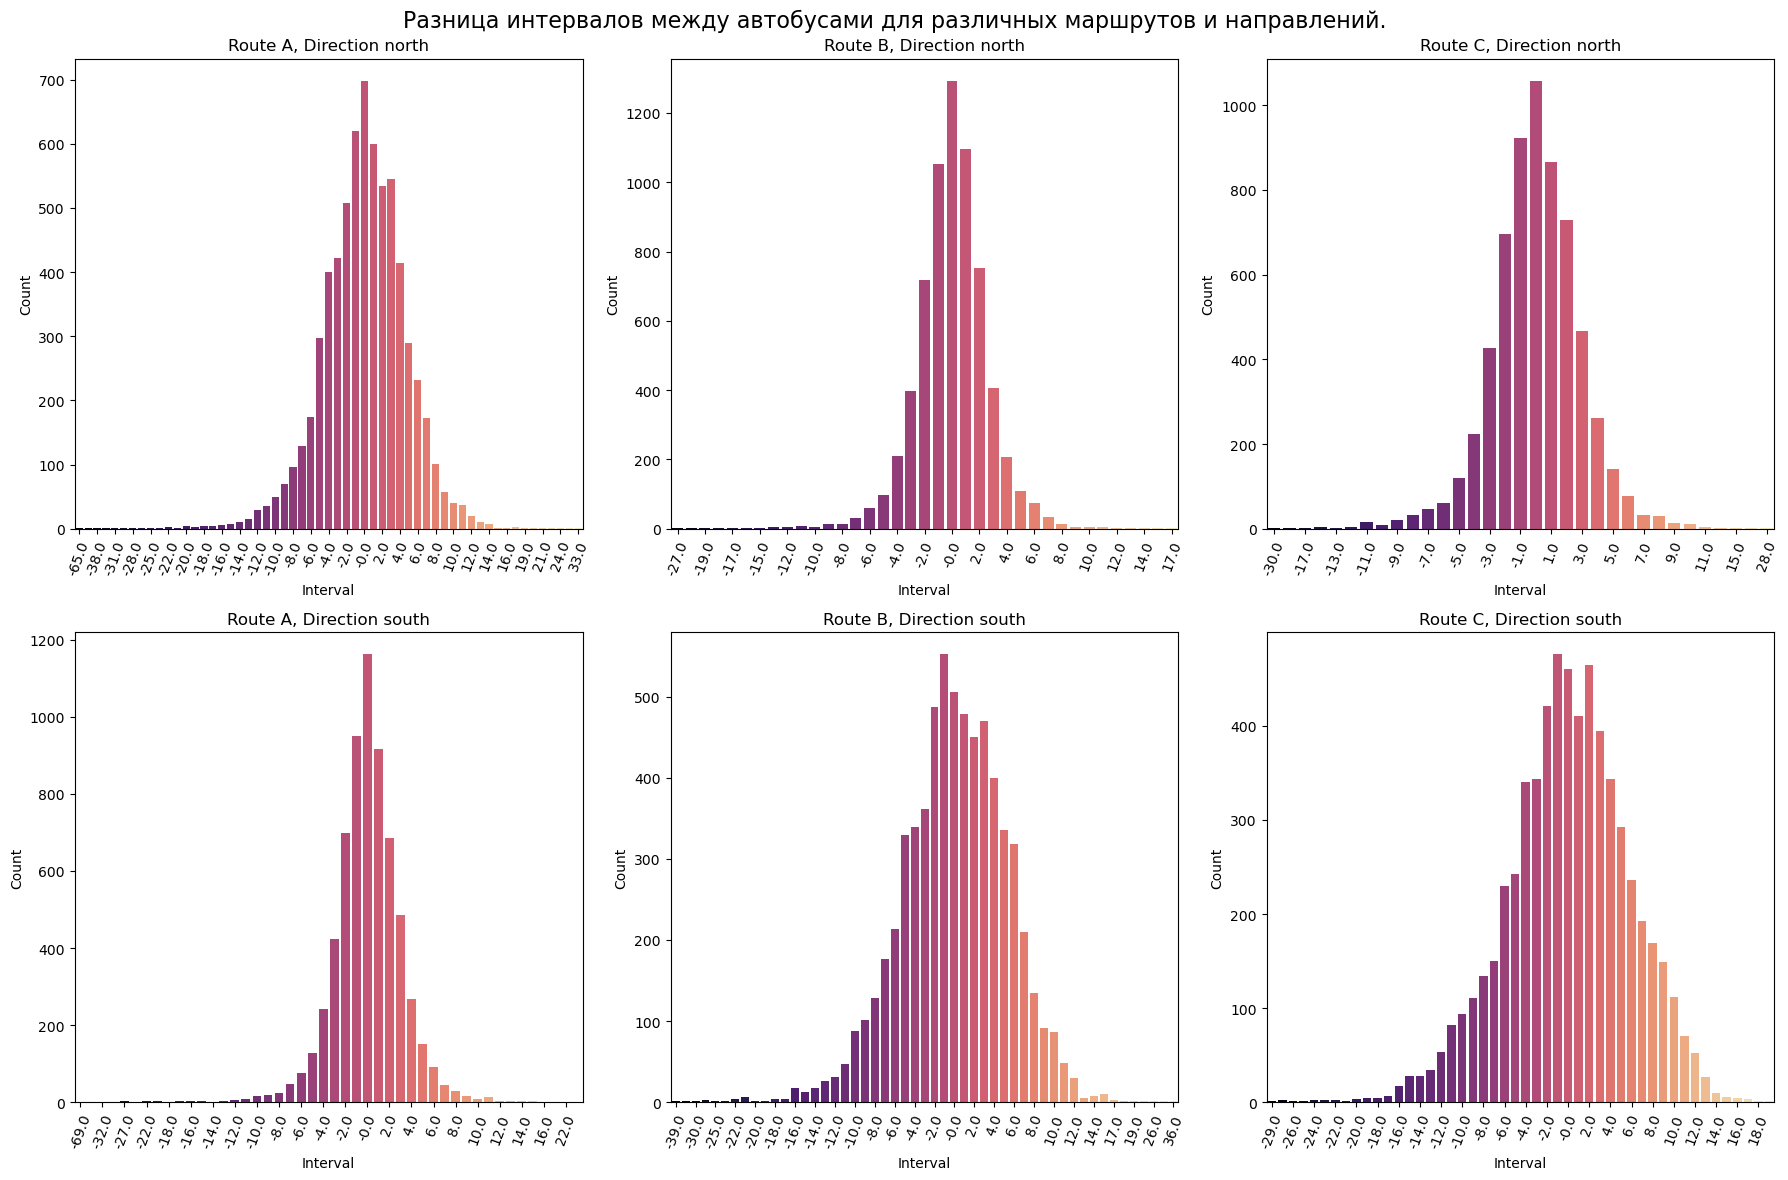

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
for i, route in enumerate(new_df['route'].unique()):
    for j, direction in enumerate(new_df['direction'].unique()):
        filtered_data = new_df[(new_df['route'] == route) & (new_df['direction'] == direction)]
        sns.barplot(data=filtered_data, x='diff_intervals',y='quantity', ax=axes[j, i], palette='magma')
        
        axes[j, i].set_title(f'Route {route}, Direction {direction}')
        axes[j, i].set_xlabel('Interval')
        axes[j, i].set_ylabel('Count')
        
        axes[j, i].set_xticklabels(axes[j, i].get_xticklabels(), rotation=70)
        n = 2  
        xticks = axes[j, i].get_xticks()
        axes[j, i].set_xticks(xticks[::n])
fig.suptitle('Разница интервалов между автобусами для различных маршрутов и направлений.', fontsize=16)
plt.tight_layout()
plt.show()

In [22]:
result_df['delay_minutes'] = round(result_df['delay_minutes']).astype(int)
new_df2 = result_df.groupby(['route', 'direction', 'delay_minutes']).size().to_frame().reset_index()

new_df2 = new_df2.rename(columns={0: 'quantity'})
new_df2

,route,direction,delay_minutes,quantity
0,A,north,-10,3
1,A,north,-9,9
2,A,north,-8,11
3,A,north,-7,41
4,A,north,-6,109
...,...,...,...,...
304,C,south,27,1
305,C,south,28,3
306,C,south,29,1
307,C,south,31,1


In [23]:
with pd.option_context('display.max_rows', None):
    display(new_df2)

,route,direction,delay_minutes,quantity
0,A,north,-10,3
1,A,north,-9,9
2,A,north,-8,11
3,A,north,-7,41
4,A,north,-6,109
5,A,north,-5,199
6,A,north,-4,338
7,A,north,-3,519
8,A,north,-2,639
9,A,north,-1,623


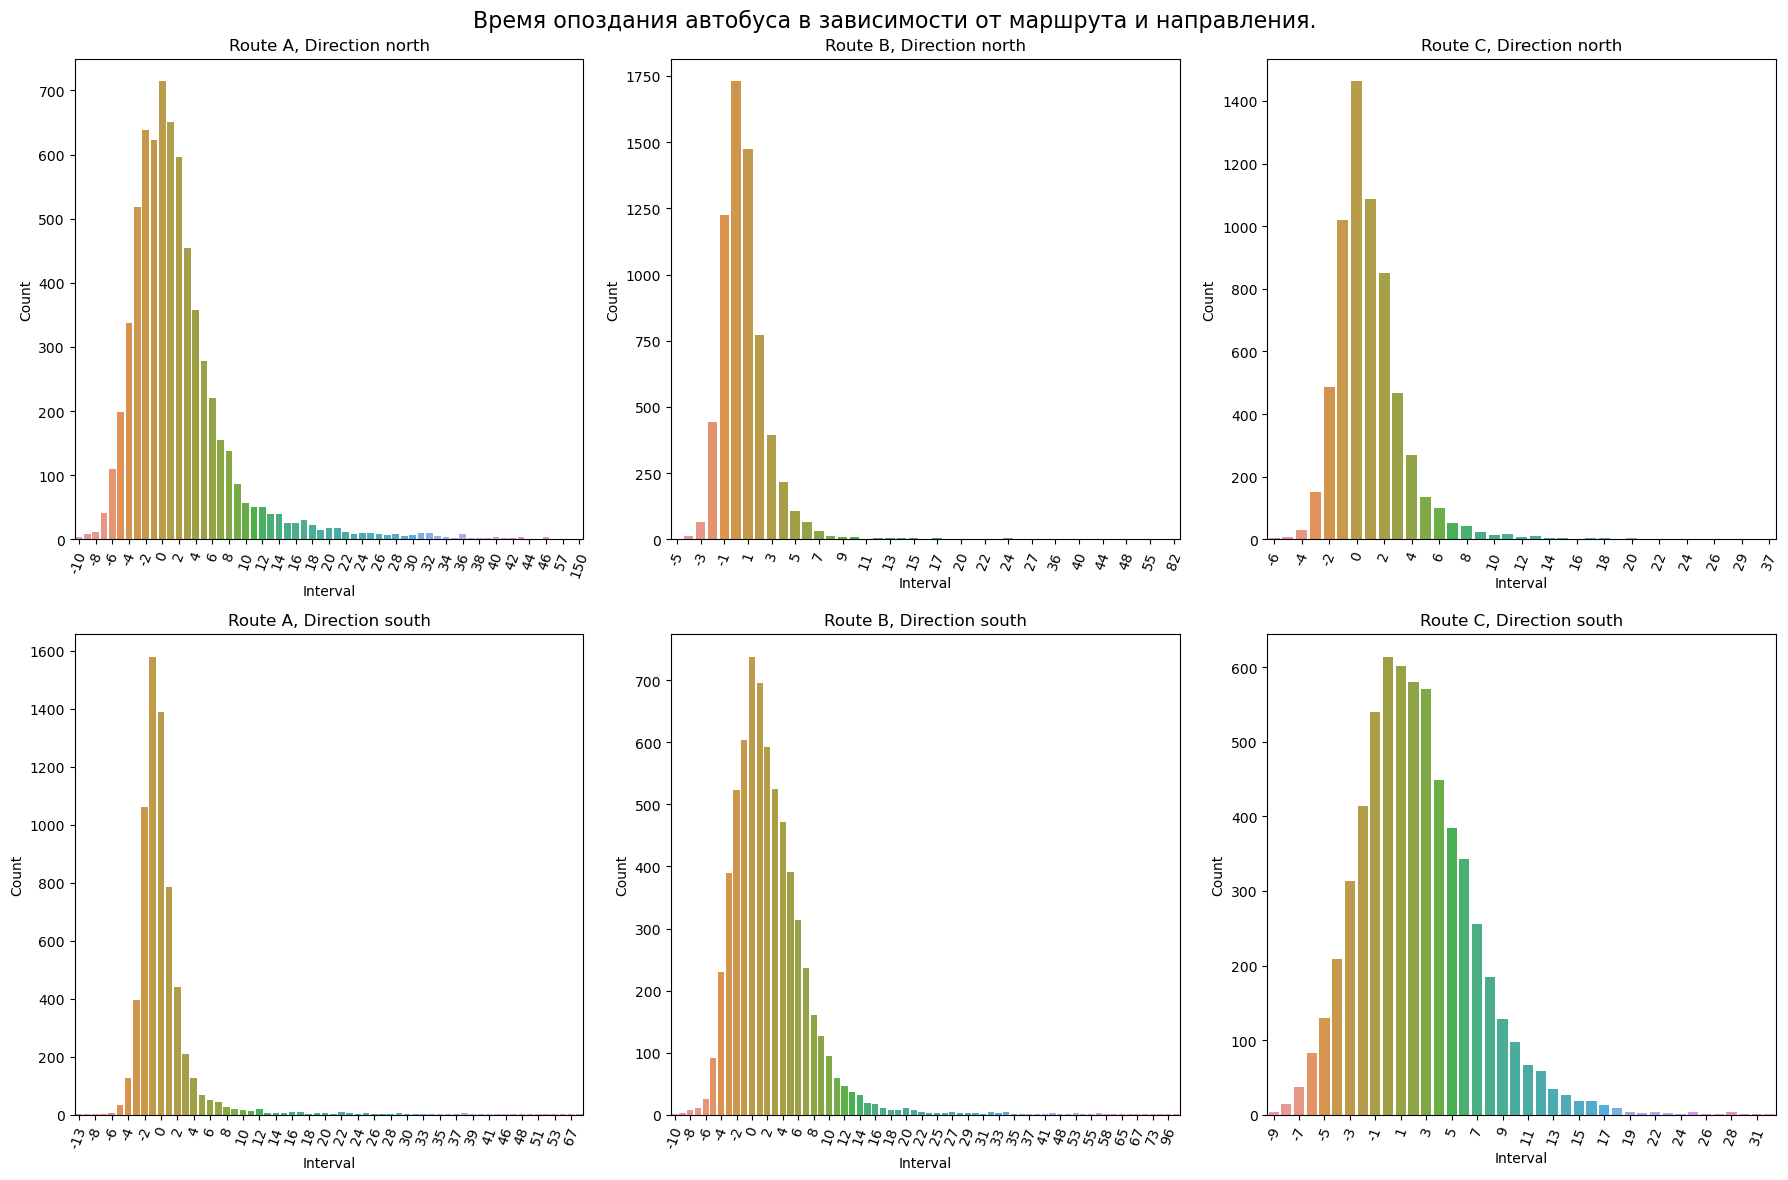

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
for i, route in enumerate(new_df2['route'].unique()):
    for j, direction in enumerate(new_df2['direction'].unique()):
        filtered_data = new_df2[(new_df2['route'] == route) & (new_df2['direction'] == direction)]
        sns.barplot(data=filtered_data, x='delay_minutes',y='quantity', ax=axes[j, i])
        
        axes[j, i].set_title(f'Route {route}, Direction {direction}')
        axes[j, i].set_xlabel('Interval')
        axes[j, i].set_ylabel('Count')
        
        axes[j, i].set_xticklabels(axes[j, i].get_xticklabels(), rotation=70)
        n = 2  
        xticks = axes[j, i].get_xticks()
        axes[j, i].set_xticks(xticks[::n])
fig.suptitle('Время опоздания автобуса в зависимости от маршрута и направления.', fontsize=16)
plt.tight_layout()
plt.show()

#### Можно, что либо сказать о маршрутах автобусов содержательно?

**1) Судя по графикам опоздания автобусов, на маршрутах А-юг, А-север и B-юг длинные хвосты, автобусы задерживаются достаточно редко, но на довольно большое количество минут. Возможно, это происходит из-за каких-то пробок или специфики маршрута.\
2) Маршруты B-север и C-север могут быть признаны как надежные по сравнению с другими маршрутами по опозданиям. Если есть возможность поехать по этим маршрутам вместо других, то стоит выбирать их.\
3) На маршруте А-север было найдено рекордное опоздание в 150 минут, но его можно считать за выброс.\
**4) Судя по графикам интервалов движение автобусов по маршрутам B-север, С-север и А-юг имеет бОльшее совпадение с расписанием, нежели на трех других маршрутах-направлениях.****

## Задание финальное ... для тех кто может
Давайте попробуем заполнить пропущенные данные в расписании  - `df_null`. Как это сделать правильно?

**Сначала привожу исходный датафрейм в подходящий вид, но в этот раз не выкидывая отсутствующие значения.**

In [25]:
df = pd.read_csv('bus_table.csv')
df.drop_duplicates(inplace=True)
df.info()

df['delimiter'] = ' '
df['table'] = pd.to_datetime(df['data'] + ' ' + df['scheduled'], format='%Y-%m-%d %H:%M:%S')
df['arrival'] =  pd.to_datetime(df['data'] + ' ' + df['actual'], format='%Y-%m-%d %H:%M:%S')
df.drop(columns=['delimiter'], inplace=True)
 
def adjust_arrival(df):
    diff_arrival_table = (df['arrival'] - df['table']).dt.total_seconds() / 60
    diff_table_arrival = (df['table'] - df['arrival']).dt.total_seconds() / 60

    df.loc[diff_arrival_table > 1350, 'arrival'] -= pd.Timedelta(days=1)
    df.loc[diff_table_arrival > 1350, 'arrival'] += pd.Timedelta(days=1)
    return df
adjust_arrival(df)

<class 'pandas.core.frame.DataFrame'>
Index: 39145 entries, 0 to 39156
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       39145 non-null  object
 1   route      39145 non-null  object
 2   direction  39145 non-null  object
 3   scheduled  38905 non-null  object
 4   actual     39145 non-null  object
dtypes: object(5)
memory usage: 1.8+ MB


,data,route,direction,scheduled,actual,table,arrival
0,2016-03-26,A,south,01:11:57,01:13:19,2016-03-26 01:11:57,2016-03-26 01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13,2016-03-26 23:19:57,2016-03-26 23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46,2016-03-26 21:19:57,2016-03-26 21:18:46
3,2016-03-26,A,south,19:04:57,19:01:49,2016-03-26 19:04:57,2016-03-26 19:01:49
4,2016-03-26,A,south,16:42:57,16:42:39,2016-03-26 16:42:57,2016-03-26 16:42:39
...,...,...,...,...,...,...,...
39152,2016-05-27,B,north,10:50:25,10:49:50,2016-05-27 10:50:25,2016-05-27 10:49:50
39153,2016-05-27,B,north,13:02:27,13:07:10,2016-05-27 13:02:27,2016-05-27 13:07:10
39154,2016-05-27,B,north,15:14:29,15:15:55,2016-05-27 15:14:29,2016-05-27 15:15:55
39155,2016-05-27,B,north,17:26:29,17:25:40,2016-05-27 17:26:29,2016-05-27 17:25:40


In [26]:
idx_nan = df[df.isnull().any(axis=1)].index
df[df.isnull().any(axis=1)].sort_values('data')

,data,route,direction,scheduled,actual,table,arrival
827,2016-03-28,A,south,NaN,17:55:57,NaT,2016-03-28 17:55:57
828,2016-03-28,A,south,NaN,15:19:03,NaT,2016-03-28 15:19:03
834,2016-03-28,A,south,NaN,16:35:25,NaT,2016-03-28 16:35:25
1546,2016-03-28,C,south,NaN,08:53:54,NaT,2016-03-28 08:53:54
1547,2016-03-28,C,south,NaN,07:36:58,NaT,2016-03-28 07:36:58
...,...,...,...,...,...,...,...
29356,2016-05-26,C,north,NaN,17:57:23,NaT,2016-05-26 17:57:23
9695,2016-05-27,C,south,NaN,17:14:51,NaT,2016-05-27 17:14:51
19421,2016-05-27,B,south,NaN,16:38:41,NaT,2016-05-27 16:38:41
4638,2016-05-27,A,south,NaN,17:52:18,NaT,2016-05-27 17:52:18


**Стоит попробовать искать по соответствующим маршрутам и направлениям похожее фактическое время прибытия автобусов и использовать время прибытия автобуса по расписанию из этих похожих строк для заполнения nan**

In [27]:
missing_table_rows = df[df['table'].isnull()]
for index, row in missing_table_rows.iterrows():

    route = row['route']
    direction = row['direction']
    arrival = row['arrival']

    # Задаю некоторое окно, чтобы найти похожие строки с похожим фактическим временем прибытия автобуса
    time_window_start = arrival - timedelta(minutes=25)
    time_window_end = arrival + timedelta(minutes=25)
    
    similar_rows = df[(df['route'] == route) & (df['direction'] == direction) & 
                      (df['arrival'] >= time_window_start) & (df['arrival'] <= time_window_end) & 
                      (~df['table'].isnull())].copy()
    
    #выбираю строку с минимальной разницей во времени прибытия
    if not similar_rows.empty:
        similar_rows['time_difference'] = abs(similar_rows['arrival'] - arrival)
        closest_row = similar_rows.loc[similar_rows['time_difference'].idxmin()]
        
        df.loc[index, 'table'] = closest_row['table']
        df.loc[index, 'scheduled'] = closest_row['scheduled']

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39145 entries, 0 to 39156
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   data       39145 non-null  object        
 1   route      39145 non-null  object        
 2   direction  39145 non-null  object        
 3   scheduled  39145 non-null  object        
 4   actual     39145 non-null  object        
 5   table      39145 non-null  datetime64[ns]
 6   arrival    39145 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(5)
memory usage: 3.4+ MB


**Больше отсутствующих значений нет. Посмотрим, как выглядят теперь заполненные значения в строках:**

In [29]:
df.loc[idx_nan].head(20)

,data,route,direction,scheduled,actual,table,arrival
383,2016-04-01,A,south,16:01:56,16:00:57,2016-04-01 16:01:56,2016-04-01 16:00:57
471,2016-03-31,A,south,15:31:56,15:28:05,2016-03-31 15:31:56,2016-03-31 15:28:05
588,2016-03-30,A,south,14:55:56,14:52:36,2016-03-30 14:55:56,2016-03-30 14:52:36
599,2016-03-30,A,south,15:11:56,15:12:06,2016-03-30 15:11:56,2016-03-30 15:12:06
685,2016-03-29,A,south,17:58:56,17:56:29,2016-03-29 17:58:56,2016-03-29 17:56:29
686,2016-03-29,A,south,16:34:56,16:32:39,2016-03-29 16:34:56,2016-03-29 16:32:39
827,2016-03-28,A,south,17:58:56,17:55:57,2016-03-28 17:58:56,2016-03-28 17:55:57
828,2016-03-28,A,south,15:17:56,15:19:03,2016-03-28 15:17:56,2016-03-28 15:19:03
834,2016-03-28,A,south,16:34:56,16:35:25,2016-03-28 16:34:56,2016-03-28 16:35:25
1284,2016-03-31,C,south,07:33:59,07:36:32,2016-03-31 07:33:59,2016-03-31 07:36:32
